# Foundations of Data Science Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis. For each observation, we have 8 different features to use for analysis and discovery of any correlation to having diabetes.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

---------------
## Contents of Notebook
---------------

* [Import dataset for exploratory analysis](#opening)
* [Exploratory Analysis](#explore)
* [Cleaning anomolies and missing data](#cleaning)
* [Data Analysis and Data Visualization](#analysis)
* [Conclusion](#conclusion)
<a id="opening"></a>
<hr>

In [97]:
#Import Necessary Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_9288/835114759.py, line 10)

The NumPy library is a powerful multi-dimensional array object useful in linear algebra, vector calculus, random number capabilities, etc.. NumPy is a fundamental package for scientific computing.

The Pandas library, which is built on top of NumPy, is very useful for data manipulation and exploratory analysis. There are 2 main data structures: Series and DataFrame, with a DataFrame being comprised of multiple series, each of which is a column of the DataFrame. Additionally, with Pandas, unlike NumPy, each column in a DataFrame can have its own data type.

Matplotlib is one of the most popular libraries for data visualization in Python. It provides high-quality graphics and a variety of plots such as histograms, bar charts, pie charts, and more.

Seaborn is a complementary library to Matplotlib and specifically targets statistical data visualizations. We will be using both of these Data Visualization libraries in this analysis.
<hr>

In [62]:
#Load Dateset

pima = pd.read_csv("diabetes.csv")

In [63]:
#Briefly analyze the first 5 records in the dataset.

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
#Find the shape of the dataframe.

print(f'Shape of the dataframe: {pima.shape} \nSize of the dataframe: {pima.size}')


Shape of the dataframe: (768, 9) 
Size of the dataframe: 6912


The shape of the dataframe provides us with simple, yet useful information. We can confirm that there are indeed 9 columns, 8 of them features, or parameters, and the final column indicating if the patient had diabetes at the time of the data collection.

We also can see that there are 768 observations.

From the '.size' function we understand that there are 6912 values within the dataset, though are not provided with the shape or variable types. This information can also easily be calculated by multiplying the number of columns by the number of rows, which are returned with the '.shape' function.
<hr>

In [65]:
#We use the .info() function to check for data types, as well as any noticeable anomalies in these early stages of the analysis.

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We see that all of the variables are numeric, with (2) columns being of data type float64, and (7) as int64.
<hr>

In [66]:
#Check for any missing or null values.

pima.isnull().values.any()

False

All of the fields in the dataset are complete. There are no null values.
<hr>

In [67]:
#We use the '.describe()' function for a brief, yet informative, statistical summary of all columns, excluding the 'Outcome' column.

pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Summary Statistics help to quickly analyze the center, spread, and shape of the dataset. Using the 'describe()' function, we are able to see a neatly formatted, brief statistical analysis of our dataframe.<br>
<br>
'count' is the number of records in the column. <br>
'mean' is the arithmetic average of all observations in the column.<br>
'Standard Deviation' is the square root of variance, which is the average of the sum of the squared differences from the column's mean for each record.<br>
'minimum' is the minimum value in the specified column.<br>
'25%' is the position of the 1st quartile, which is used to calculate the Inter-Quartile Range (IQR).<br>
'50%' or the 2nd quartile, is the median of the values in the column.<br>
'75%' is the position of the 3rd quartile, which is used to calculate the Inter-Quartile Range (IQR).<br>
'max' is the maximum value in the specified column.<br>
<br>
This brief analysis function clearly shows us that there are a few anomalies in the dataset which will need to be addressed.
<br>For example: <br>
    -The minimum values for Glucose, BloodPressure, SkinThickness, Insulin, BMI are 0. This is not possible and will need to be addressed for proper analysis and modeling.<br>
    -The Max value of Pregnancies (14) should also be further analyzed to determine its validity.
<hr>

<a id="explore"></a>

# Exploratory Analysis:

<hr>

In [68]:
#Review observations where 'Glucose' = 0

pima[(pima['Glucose']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


We have 5 observations with 'Glucose' = 0.
<hr>

In [69]:
#Review observations where 'BloodPressure' = 0

pima[(pima['BloodPressure']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


We have 35 observations with 'BloodPressure' = 0.
<hr>

In [70]:
#Review observations where 'SkinThickness' = 0

pima[(pima['SkinThickness']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


We have 227 observations where 'SkinThickness' = 0
<hr>

In [71]:
#Review observations where 'Insulin' = 0
pima[(pima['Insulin']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


We have 374 observations where 'Insulin' = 0
<hr>

In [72]:
#Review observations where 'BMI' = 0

pima[(pima['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


We have 11 observations where 'BMI' = 0
<hr>

In [73]:
#Check the accuracy of the observation with max pregnancies
pima[(pima['Pregnancies']==pima['Pregnancies'].max())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


Although the number of pregnancies (17) for observation 159 is well above the mean value, and 75% IQR for all observations, we cannot discount its accuracy, given the remaining variables of the observation do not drastically deviate from the norms of the dataset.
<hr>

<a id="cleaning"></a>

# Clean Dataset:

<hr>

In [74]:
# We will replace the missing 'Insulin' values with that of the median of all observations of this feature.

median_Insulin = pima['Insulin'].median()

pima=pima.replace({'Insulin': {0: median_Insulin}})

In [75]:
# We will replace the missing 'SkinThickness' values with that of the median of all observations of this feature.

median_SkinThickness = pima['SkinThickness'].median()

pima=pima.replace({'SkinThickness': {0: median_SkinThickness}})

In [76]:
# We will replace the missing 'BloodPressure' values with that of the median of all observations of this feature.

median_BloodPressure = pima['BloodPressure'].median()

pima=pima.replace({'BloodPressure': {0: median_BloodPressure}})

In [77]:
# We will replace the missing 'Glucose' values with that of the median of all observations of this feature.

median_Glucose = pima['Glucose'].median()

pima=pima.replace({'Glucose': {0: median_Glucose}})

In [78]:
# As we do not have the necessary information within this dataset to calculate the BMI of each observation, we will replace the missing 'BMI' values with that of the median of all observations of this feature.

median_BMI = pima['BMI'].median()

pima=pima.replace({'BMI': {0: median_BMI}})

<hr>

### Review changes:

In [79]:
#We will perform a 'sanity check' to ensure that all of the '0' values have been replaced as intended in the above code.

pima[(pima['BloodPressure']==0) | (pima['Glucose']==0) | (pima['SkinThickness']==0)| (pima['Insulin']==0)| (pima['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [80]:
#Review the Summary Statistics with the '.describe()' function after all of the anomalies have been resolved

pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [81]:
#Confirm that the shape and size of the dataset has not been altered.

print(f'Shape of the dataframe: {pima.shape} \nSize of the dataframe: {pima.size}')

Shape of the dataframe: (768, 9) 
Size of the dataframe: 6912


<hr>

### Analysis of Data Cleaning:


The mean value of the Insulin variable has been affected the most by the data cleaning. This parameter has the highest standard deviation so we will accept the new values. 
<br>
The minimal changes in the remaining summary statistics show that our choice to replace all '0' values with that of the median for each feature has proven to be an effective solution.
<hr>

<a id="analysis"></a>

# Data Analysis and Visualization:

<hr>

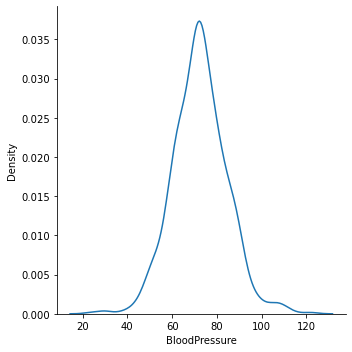

In [82]:
#We use Seaborn to plot the distribution of BloodPressure.

sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

Using the above distribution plot, we can see that the Probability Density of the variable 'BloodPressure' is mainly distributed between the values 40 and 100 (mm Hg).
<hr>

In [83]:
#Analizing central tendencies of the BMI variable throughout the dataset

m1 = pima['BMI'].mean()  #Mean
print(f'The mean value for BMI is: {m1}')
m2 = pima['BMI'].median()  #Median
print(f'The median value for BMI is: {m2}')
m3 = pima['BMI'].mode()[0]  #Mode
print(f'The mode value for BMI is: {m3}')

The mean value for BMI is: 32.45091145833331
The median value for BMI is: 32.0
The mode value for BMI is: 32.0


The mean of the variable 'BMI' is 32.45091145833331, the median of the variable 'BMI' is 32, and the mode of the variable 'BMI' is 32. The central tendencies are not all equal, though the correlation is nearly 1 between the mean and the median, as well as the mean and the mode. The central tendencies of the median and mode are equal.
<hr>

In [84]:
#Analizing the number of observations having a Glucose level above that of the mean level of glucose from all observations.

pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

343

343 womens' 'Glucose' level is above the mean level of 'Glucose'.
<hr>

In [85]:
#Analizing the count of women whose Blood Pressure is equal to that of the mean, and whose BMI is less than the median of the BMI variable.

pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())].count()

Pregnancies                 37
Glucose                     37
BloodPressure               37
SkinThickness               37
Insulin                     37
BMI                         37
DiabetesPedigreeFunction    37
Age                         37
Outcome                     37
dtype: int64

37 women observed have their 'BloodPressure' equal to the median of 'BloodPressure' AND their 'BMI' less than the median of all 'BMI' observations. We must be cautious when analyzing data whose features were not initially observed and were altered during the data cleaning process.<br>
In this instance, the median value of the inital 'BloodPressure' observations was used to fill in all values of 0. This method was also emplolyeed for the 'BMI' feature. As we are not comparing 2 medians (which would return all observations meeting this condition, as well as the observations where both of these features were changed to the median), we will use this information with caution.
<hr>

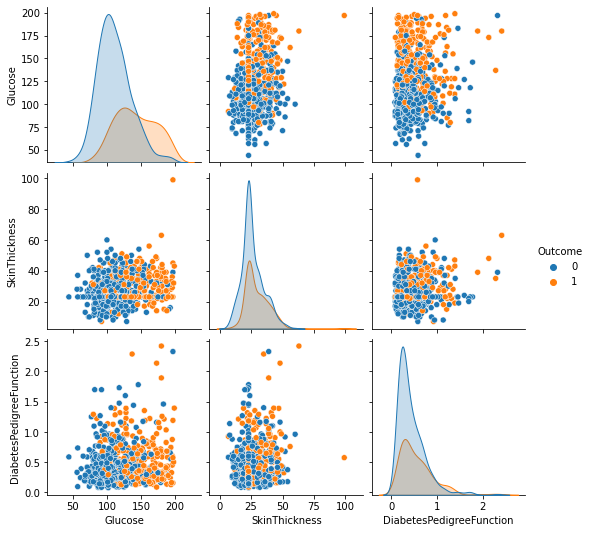

In [86]:
#Using Seaborn, we will create a pairplot for variables 'Glucose', 'SkinThickness' and 'DiabetesPedigreeFunction'.

sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

This pair plot shows the relationships between 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction' variables, as well as their Outcome as not diabetic (0) or diabetic (1). From this pair plot we can observe that there is positive correlation between 'Glucose' & 'DiabetesPedigreeFunction' and 'Glucose' & 'SkinThickness'.
<hr>

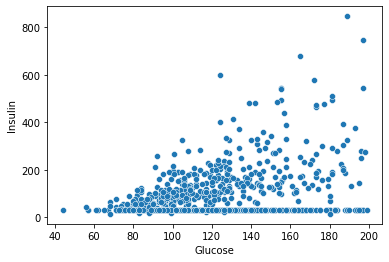

In [87]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

From the above scatter plot between 'Glucose" and 'Insulin", we are able to see each pair of values treated as a pair of coordinates plotted as points in the plane. We are also able to observe potential outliers. For example, there are a significant number of variables in the 'Insulin' column with the same value slightly above 0. It also appears that there is a weak positive correlation between the 2 variables, specifically when outliers are not observed.

In [88]:
#Further analyze what seem to be outliers in the 'Insulin' parameter

pima[(pima['Insulin']<200)].mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99.0,72.0,23.0,30.5,32.0,0.254,22.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,0.258,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.261,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.268,NaN,NaN


In [89]:
#The mode of all values below 200 of the 'Insulin' variable is 30.5. We will count the number of occurences of this value

pima[(pima['Insulin']==30.5)].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

As the number of observations with an 'Insulin' value of 30.5 is nearly half of the observations, we will not alter this data.
<hr>

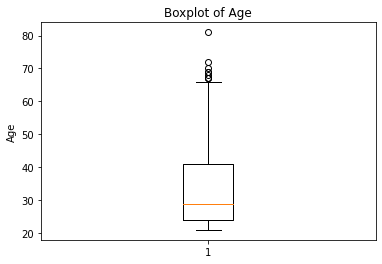

In [90]:
#Using Matplotlib we will create a boxplot for the 'Age' variable.

plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

Above is a boxplot for the 'Age' variables. There are outliers, which are greater than the value of the 'Quartile  3' added to the Interquartile-range multiplied by 1.5. These are to be considered in our analysis.
<hr>

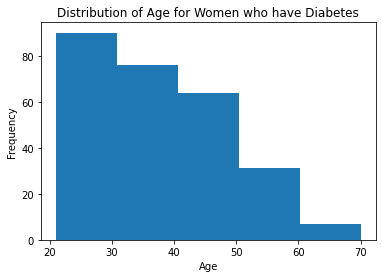

In [91]:
#We will use Matplotlib to create histograms for variable Age to understand the number of women in different Age groups given that they have diabetes or not.

plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#The below plot shows the age distribution for women who HAVE diabetes

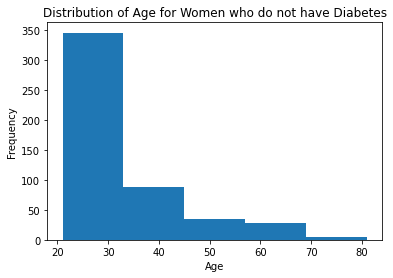

In [92]:
plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#The below plot shows the age distribution for women who DO NOT have diabetes

The top histogram is a visualization of the distribution of Age for Women who have Diabetes. We see a negative correlation between age and having diabetes. We can further visualize that a higher frequency of those surveyed who have diabetes are younger in age.

The bottom histogram is a visualization of the distribution of Age for Women who do NOT have Diabetes. We also see a negative correlation between age and not having diabetes. We can further visualize that a lower frequency of those surveyed who do NOT have diabetes are more likely to be younger in age.

By comparing both histograms, and paying particular attention to the frequencies of each chart, we can conclude that the higher the age, the more likely our observation is to have diabetes. We can also very clearly see that regardless of diabetic status, each histogram has a right skew in age along the x-axis. This distribution of age is further supported by the mean age variable of 33.240885 from a range of 21 to 81. Simply put: more women of younger age were surveyed.
<hr>

In [93]:
#We will look at the Inter Quartile Range of all the variables.

Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                9.0000
Insulin                     96.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


The Inter Quartile Range (IQR) of all variables can most easily be visualized above. The IQR is used as it is quite effective against outliers in the data. A Quantile-quantile plot provides visualization of the above data.
<hr>

In [94]:
#We will look at a correlation matrix to further analyze and identify any noteworthy correlations between variables.

corr_matrix = pima.iloc[:,0:9].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


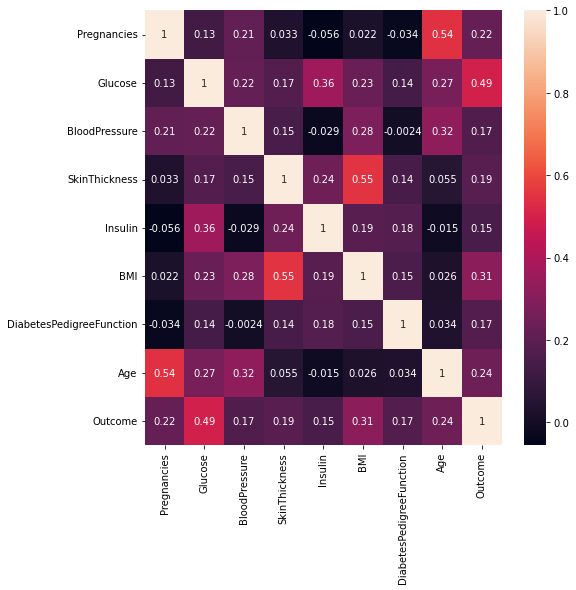

In [95]:
#We will use Seaborn to create a Heatmap to further analyze and visualize this data.

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

<hr>

<a id="conclusion"></a>

# <center><u>Conclusion:</U></center>

The above heatmap provides insight as to the correlation between each variable of the experiment, excluding 'Outcome'. Furthermore, the heatmap shows a majority of weak correlations between the majority of these chosen variables. The strongest positive correlations on the heatmap is between 'Age' and 'Pregnancies', and 'BMI' and 'SkinThickness'. 
<br><br>
What we can conclude from this heatmap is that 'Glucose' has the highest correlation with 'Outcome', or having diabetes. Other variables correlate with one another, as previously noted; however we cannot extend these correlations to their relationship with the 'Outcome' variable.
<br>Furthermore, as numerous parameters contained missing fields that were substituted using an appropriate statistical method, 'Glucose' was not manipulated, and contained complete and accurate data, which provides strong, unaltered evidence to support this coorelation.
<hr>